## 데이터셋

In [18]:
# %%writefile setting.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import mglearn
from IPython.display import display
import seaborn as sns
from matplotlib import font_manager, rc, rcParams
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
rcParams['axes.unicode_minus'] = False

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>


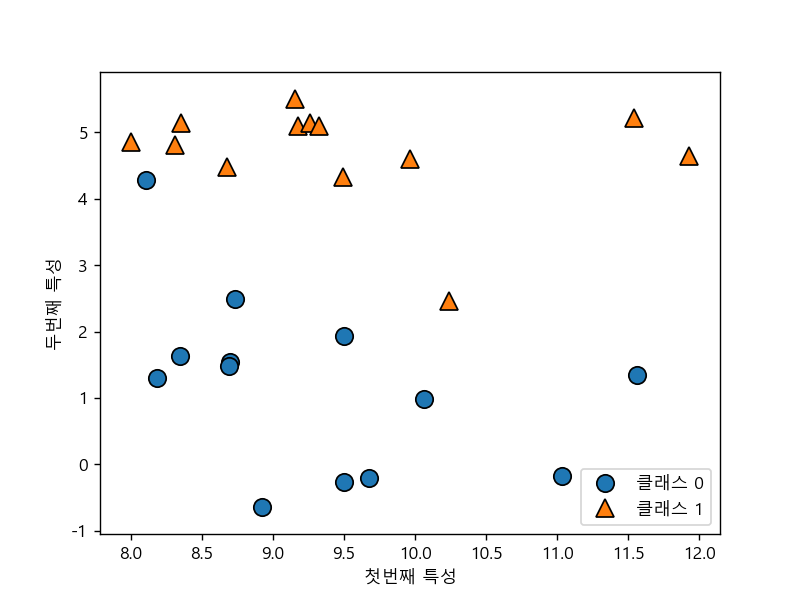

X.shape: (26, 2)


In [19]:
X,y = mglearn.datasets.make_forge()
plt.figure()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['클래스 0','클래스 1'],loc='best')
plt.xlabel('첫번째 특성')
plt.ylabel('두번째 특성')
print('X.shape:',X.shape)

<IPython.core.display.Javascript object>


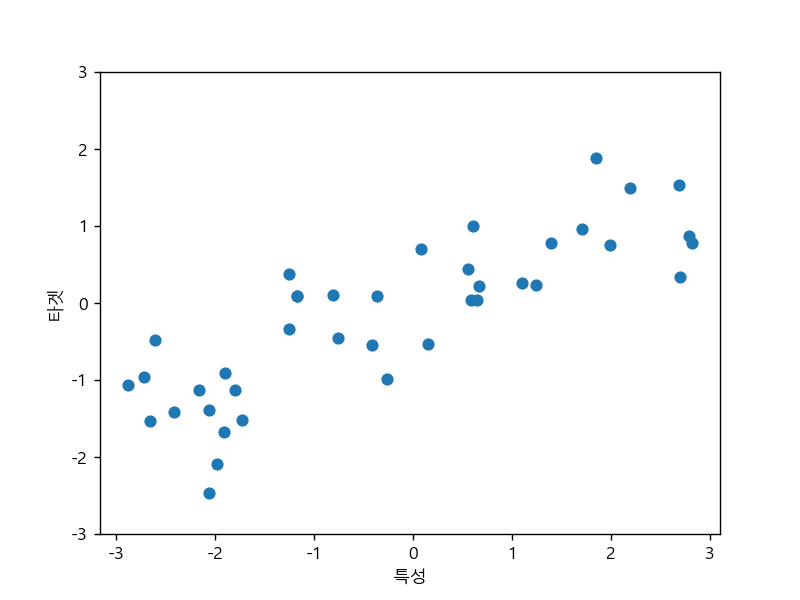

Text(0, 0.5, '타겟')

In [20]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.figure()
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('특성')
plt.ylabel('타겟')

In [21]:
from sklearn.datasets import load_breast_cancer # 유방암 데이터
cancer = load_breast_cancer()
print('cancer.keys():\n',cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [22]:
print('유방암 데이터의 형태:', cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [23]:
print('class info:\n',
      {n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))})

class info:
 {'malignant': 212, 'benign': 357}


In [24]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [25]:
from sklearn.datasets import load_boston # 보스턴 주택가격
boston = load_boston()

## K-Nearest Neighbors  

- n_neighbor : 경계 결정에 이용할 가장 가까운 샘플의 수를 결정
    - 값이 작을 수록 복잡한 경계, 값이 클 수록 단순한 경계
    
- 많은 양의 데이터, 희소행렬, 범주형에는 잘 작동하지 않는다. 

<IPython.core.display.Javascript object>


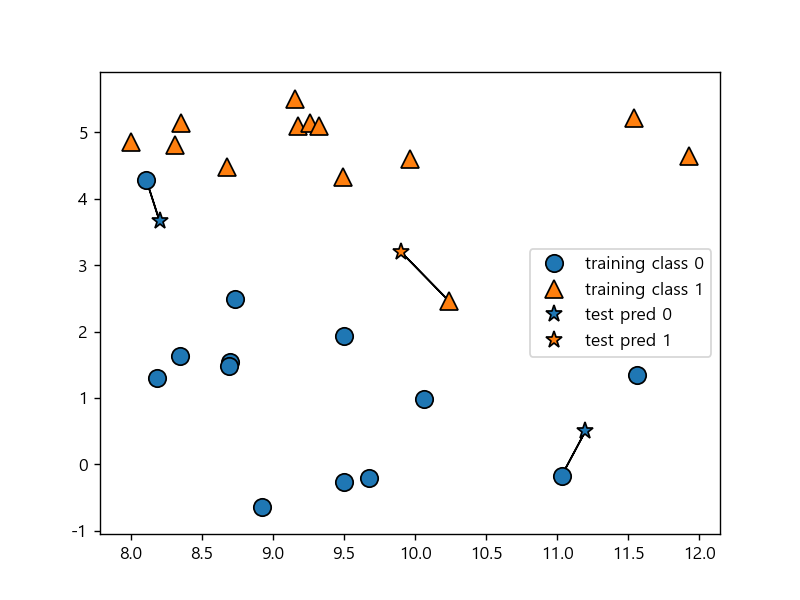

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [26]:
plt.figure()
mglearn.plots.plot_knn_classification(n_neighbors=1)

<IPython.core.display.Javascript object>


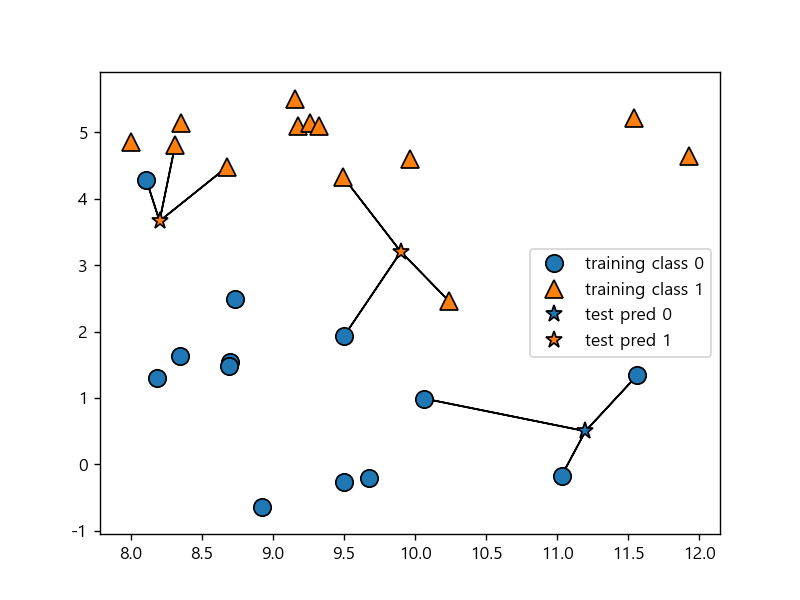

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [27]:
plt.figure()
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [31]:
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_forge()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
print('test prediction:',knn_clf.predict(X_test))

test prediction: [1 0 1 0 1 0 0]


In [34]:
print('테스트 정확도: {:.2f}'.format(knn_clf.score(X_test,y_test)))

테스트 정확도: 0.86


### 결정경계

<IPython.core.display.Javascript object>


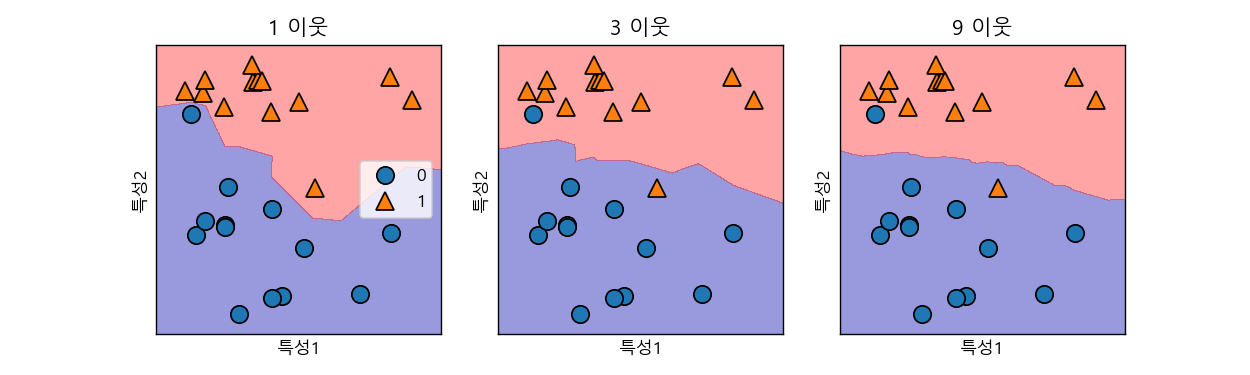

In [35]:
fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(knn_clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{} 이웃'.format(n_neighbors))
    ax.set_xlabel('특성1')
    ax.set_ylabel('특성2')
axes[0].legend(loc='best')

In [36]:
# 유방암 데이터 이용
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
# stratify : 계층적 분할

<IPython.core.display.Javascript object>


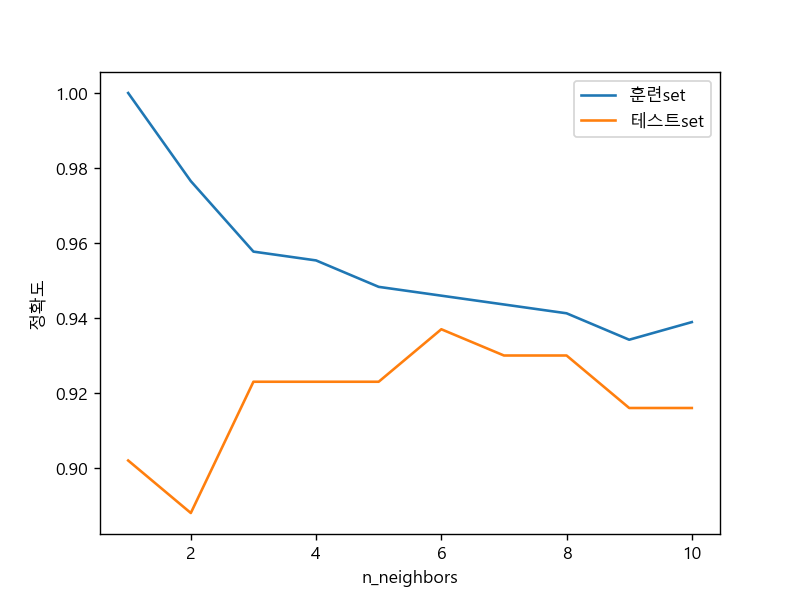

In [37]:
training_accuracy = []
test_accuracy = []

neighbor_setting = range(1,11)
for n_neighbors in neighbor_setting:
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_clf.fit(X_train,y_train)
    
    training_accuracy.append(knn_clf.score(X_train,y_train))
    test_accuracy.append(knn_clf.score(X_test,y_test))

    
plt.figure()  
plt.plot(neighbor_setting,training_accuracy, label = '훈련set')
plt.plot(neighbor_setting,test_accuracy, label='테스트set')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()

### k-최근접 이웃 회귀

<IPython.core.display.Javascript object>


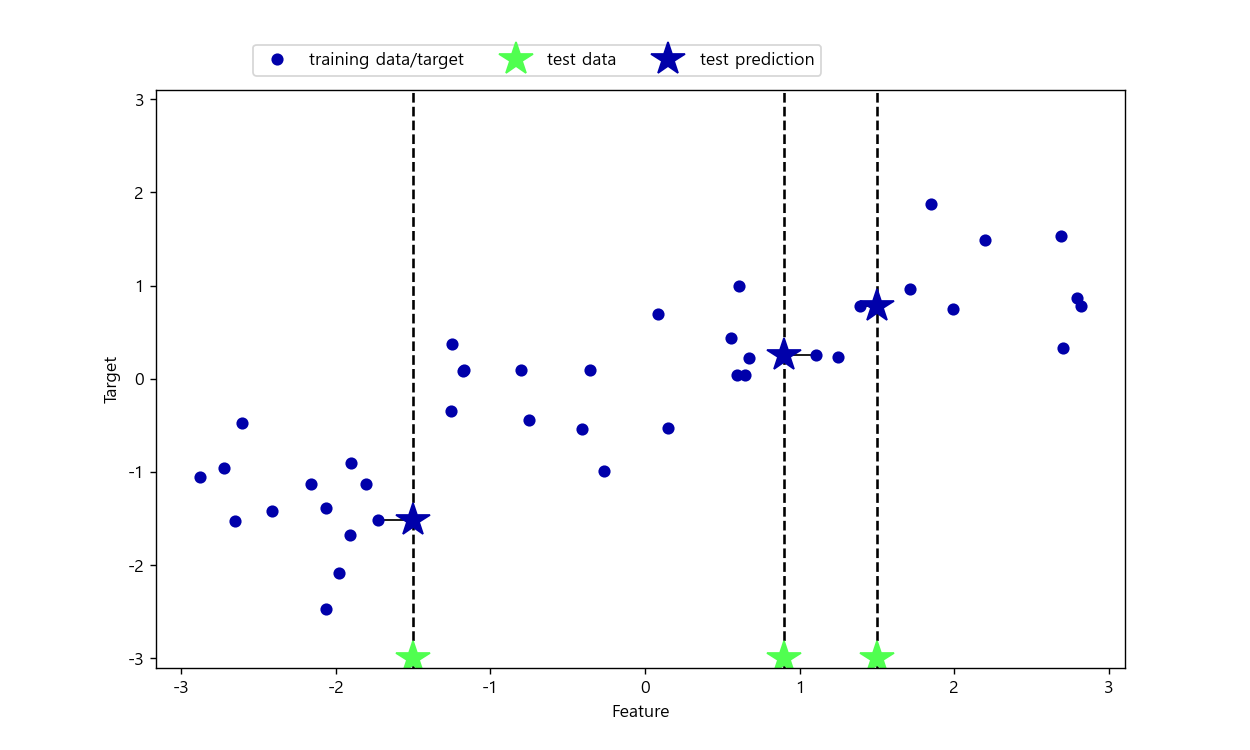

In [38]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

<IPython.core.display.Javascript object>


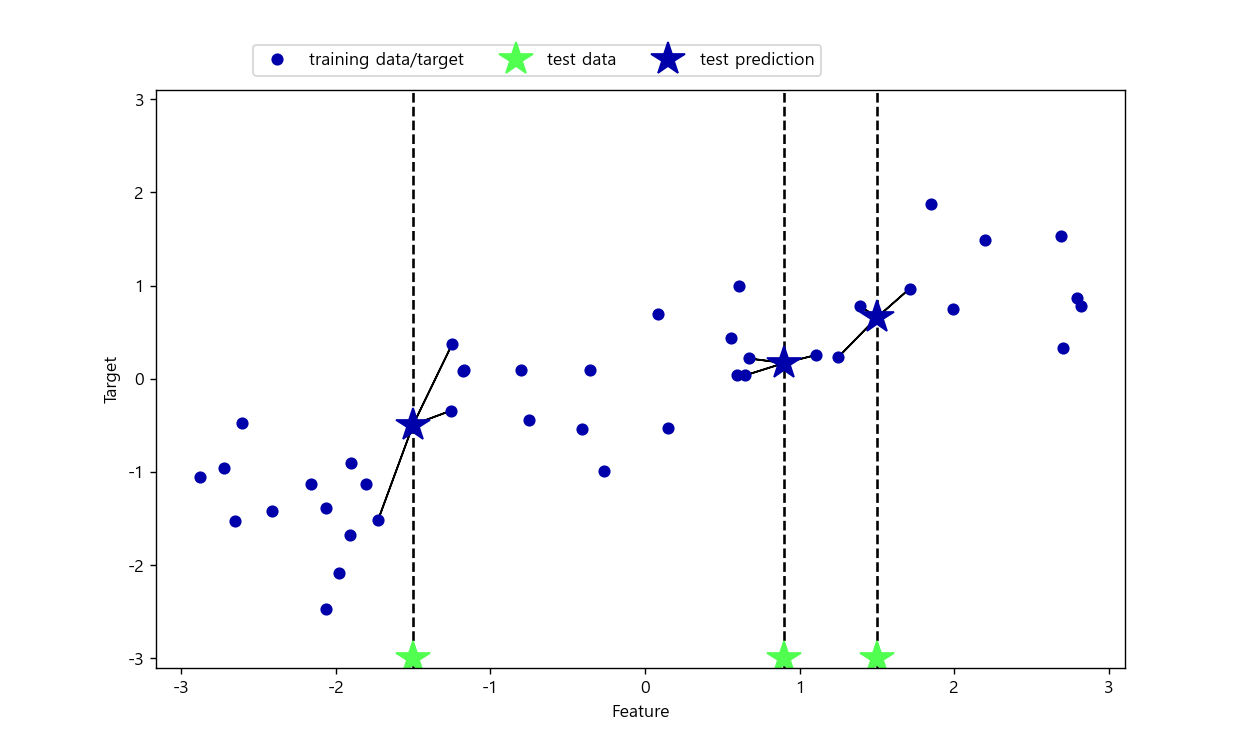

In [39]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [44]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [45]:
reg = KNeighborsRegressor()
reg.fit(X_train,y_train)

KNeighborsRegressor()

In [46]:
print('테스트 세트 예측:\n',reg.predict(X_test))

테스트 세트 예측:
 [-0.31560601  0.15952474  1.02677816 -1.69801095 -1.40261905 -1.77581224
  0.24824413  0.99712017 -0.10897279 -1.40261905]


In [47]:
print('테스트세트 R^2:{:.2f}'.format(reg.score(X_test,y_test)))

테스트세트 R^2:0.71
